# evaluation.ipynb

**Projekt:** Spotify-Datensatz  
**Autor:** Erjon Hulaj  
**Datum:** 05.04.2025  

## Evaluation des Modells
In diesem Notebook analysiere ich die Qualität meines Vorhersagemodells anhand statistischer Metriken und einer Wahrheitsmatrix.

## (4.1) Aussagekräftige Felder

Für mein Modell zur Vorhersage der Popularität von Songs habe ich untersucht, welche Features besonders aussagekräftig sind.  
Durch Korrelationen, visuelle Analyse (Scatterplots) und Modelltraining haben sich folgende Felder als besonders wichtig herausgestellt:

- **energy**
- **danceability**
- **valence**
- **loudness**
- **duration_ms**

Diese Felder haben eine erkennbare Verbindung zur Popularität, da sie musikalische Eigenschaften beschreiben, die den Hörgenuss und damit die Beliebtheit beeinflussen können.


In [1]:
import pandas as pd

df = pd.read_csv('/Users/erjon/Library/CloudStorage/OneDrive-AlteKantonsschuleAarau/BBB/Module/2. Jahr/M259/LB/dataset.csv')

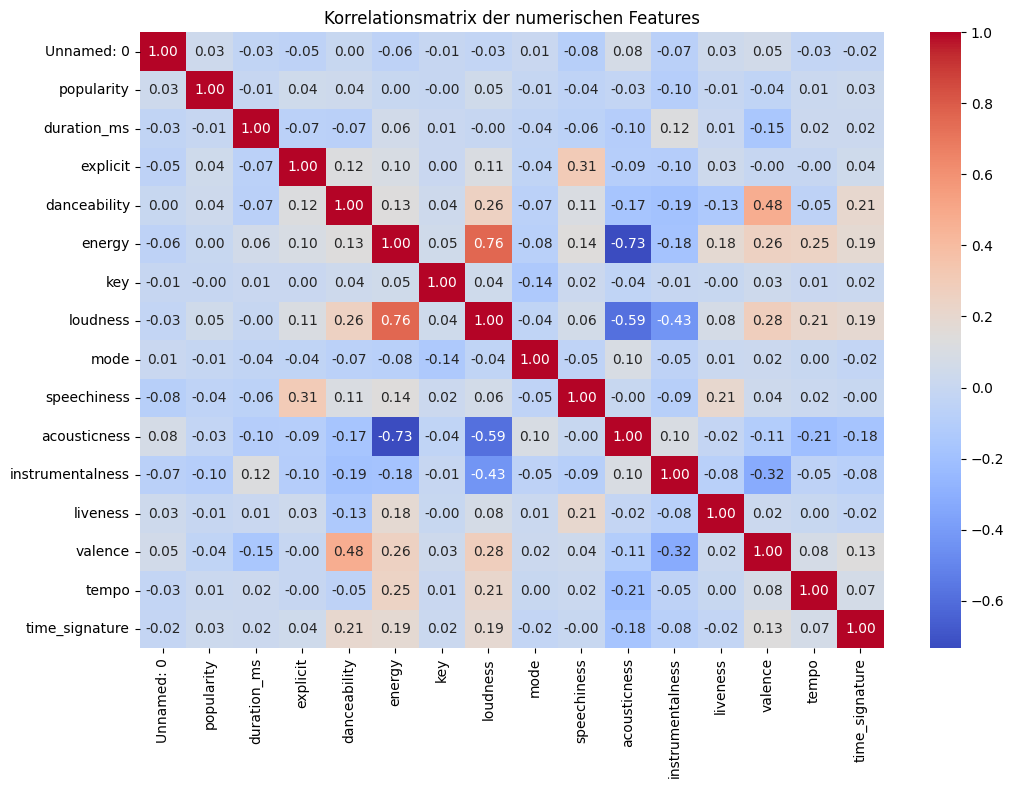

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationen berechnen und visualisieren
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix der numerischen Features")
plt.show()

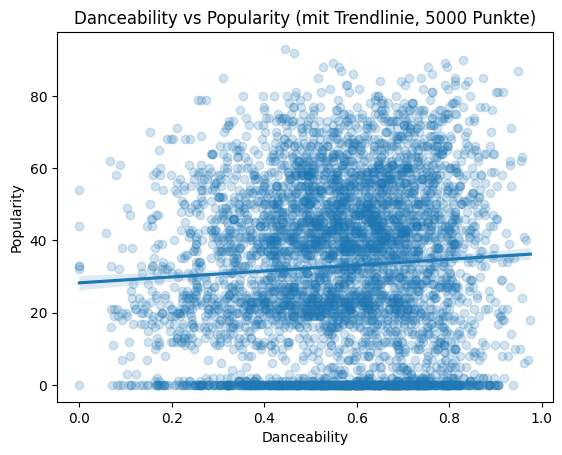

In [3]:
# Bessere Übersicht: 5000 zufällige Punkte für Danceability vs Popularity
df_sample = df.sample(n=5000, random_state=42)

sns.regplot(x=df_sample["danceability"], y=df_sample["popularity"], scatter_kws={'alpha': 0.2})
plt.title("Danceability vs Popularity (mit Trendlinie, 5000 Punkte)")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

### Beschreibung

Um die Beziehung zwischen der `danceability` eines Songs und seiner Beliebtheit `popularity` besser sichtbar zu machen, habe ich die Visualisierung angepasst.

Ich habe mich daher für eine Visualisierung mit `regplot()` entschieden, welche zusätzlich eine **Trendlinie** einzeichnet und die Punkte halbtransparent darstellt. Dadurch sieht man einerseits die Dichte der Verteilung besser und andererseits, ob ein **linearer Zusammenhang** zwischen den Variablen besteht.

Diese Darstellung ist wesentlich interpretierbarer und unterstützt die Auswahl dieses Merkmals als relevantes Feature für das Modell.

In diesem Fall ist es so, dass die Trendlinie ansteigt und je tanzbarer ein Song ist, desto beliebter ist er.

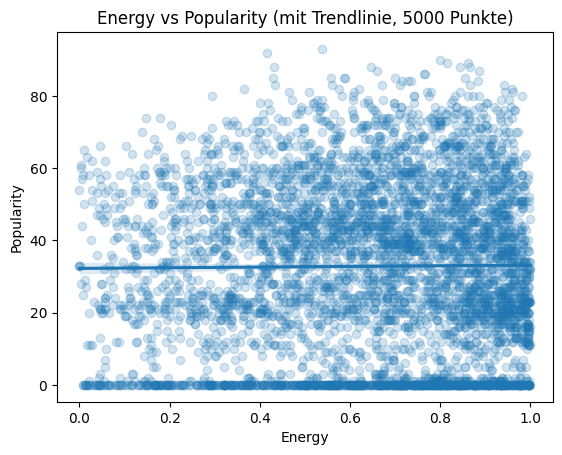

In [4]:
# Bessere Übersicht: 5000 zufällige Punkte für Energy vs Popularity
sns.regplot(x=df_sample["energy"], y=df_sample["popularity"], scatter_kws={'alpha': 0.2})
plt.title("Energy vs Popularity (mit Trendlinie, 5000 Punkte)")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()

### Beschreibung:
Dieser Plot zeigt, ob ein Zusammenhang zwischen der Energie eines Songs (z. B. schnelle Beats, laute Instrumente) und seiner Beliebtheit besteht. Eine leichte Tendenz nach oben könnte darauf hindeuten, dass energiegeladene Songs tendenziell beliebter sind. In diesem Fall ist die Linie flach und es gibt keinen Zusammenhang.

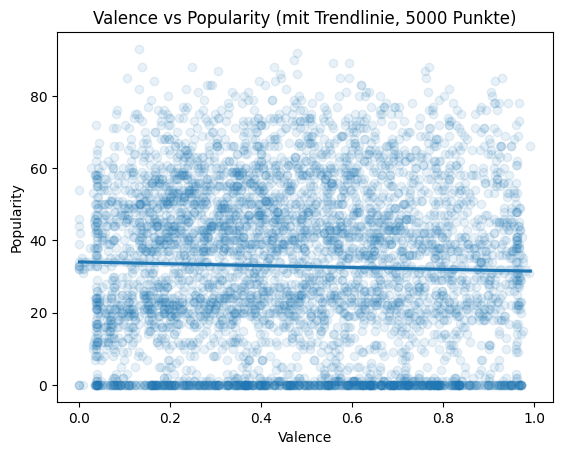

In [5]:
# Zufällig 5000 Zeilen ziehen für bessere Übersicht
df_sample = df.sample(n=5000, random_state=42)

sns.regplot(x=df_sample["valence"], y=df_sample["popularity"], scatter_kws={'alpha': 0.1})
plt.title("Valence vs Popularity (mit Trendlinie, 5000 Punkte)")
plt.xlabel("Valence")
plt.ylabel("Popularity")
plt.show()

### Beschreibung:
Hier wird untersucht, ob fröhlich klingende Songs (valence = musikalische Positivität) häufiger beliebt sind. Eine positive Steigung würde nahelegen, dass optimistische Songs eine höhere Popularität erzielen. In diesem Fall sinkt die Linie, was darauf hindeutet, dass je fröhlicher der Song klingt, desto weniger popularity hat er.

## (4.2) Messmetrik: MSE und R²

Ich habe den mittleren quadratischen Fehler (MSE) und das Bestimmtheitsmass (R²) verwendet, um mein Modell zu bewerten.  
- **MSE** zeigt, wie stark die Vorhersagen vom tatsächlichen Wert abweichen (je kleiner, desto besser).
- **R²** zeigt, wie viel der Zielvariable durch das Modell erklärt wird (max. 1.00).

Diese Metriken sind bei Regressionsmodellen Standard und sehr gut geeignet zur Bewertung der Modellgüte.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Datensatz laden
df = pd.read_csv("/Users/erjon/Library/CloudStorage/OneDrive-AlteKantonsschuleAarau/BBB/Module/2. Jahr/M259/LB/dataset.csv")

# Features (X) und Zielvariable (y)
X = df[["energy", "danceability", "loudness", "valence", "duration_ms"]]
y = df["popularity"]

# Aufteilen in Training und Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen
y_pred = model.predict(X_test)

Das Modell wurde mit einer linearen Regression trainiert. Dafür habe ich die Daten mit train_test_split aufgeteilt und anschliessend das Modell mit .fit() angepasst. Die Vorhersagen erfolgen mit .predict().

In [7]:
# Beispiel 1: sehr energiegeladen, tanzbar, fröhlich
sample1 = pd.DataFrame([{
    "energy": 0.95,
    "danceability": 0.9,
    "loudness": -4,
    "valence": 0.85,
    "duration_ms": 200000
}])
print("Vorhersage beliebter Song:", model.predict(sample1)[0])

# Beispiel 2: ruhig, wenig tanzbar, eher melancholisch
sample2 = pd.DataFrame([{
    "energy": 0.2,
    "danceability": 0.3,
    "loudness": -10,
    "valence": 0.2,
    "duration_ms": 180000
}])
print("Vorhersage ruhiger Song:", model.predict(sample2)[0])

Vorhersage beliebter Song: 33.19130274553329
Vorhersage ruhiger Song: 35.40993976342631


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Metriken berechnen
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mittlerer quadratischer Fehler (MSE):", round(mse, 2))
print("Bestimmtheitsmass (R²-Score):", round(r2, 2))

Mittlerer quadratischer Fehler (MSE): 488.86
Bestimmtheitsmass (R²-Score): 0.01


### Bewertung der Modellqualität mit Metriken

- **Mittlerer quadratischer Fehler (MSE)** liegt bei 488.86. Das bedeutet, dass die durchschnittliche quadratische Abweichung zwischen vorhergesagten und echten Popularitätswerten relativ hoch ist.
- **Bestimmtheitsmass (R²-Score)** beträgt 0.01. Das Modell erklärt also nur ca. 1 % der Varianz in den Popularitätswerten. Dies zeigt, dass das lineare Modell die Zusammenhänge in den Daten nur sehr schlecht abbildet.

→ Die Messmetriken bestätigen, dass das Modell noch deutliches Verbesserungspotenzial hat.


## (4.3) Wahrheitsmatrix, Recall & Precision

Zur Bewertung meines Modells als Klassifikation habe ich die Popularität in zwei Klassen eingeteilt:

- Beliebt (>= 50)
- Nicht beliebt (< 50)

Ein Song wurde als korrekt beliebt erkannt, wenn:

- er im echten Wert y_test >= 50 ist,
- vom Modell als beliebt eingeschätzt wird (y_pred >= 50)
- und die Vorhersage maximal 10 Punkte vom echten Wert abweicht (|y_pred - y_test| < 10).

Mit Hilfe einer Confusion Matrix konnte ich `Precision` und `Recall` berechnen.
Diese zeigen, wie zuverlässig das Modell beliebte Songs erkennt. Dies ist besonders hilfreich, wenn man etwa gezielt nur erfolgreiche Songs empfehlen möchte.

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

# Definition: Beliebt = >= 50 und nah genug (Toleranz)
toleranz = 10
schwelle = 50 

y_true_class = (y_test >= schwelle).astype(int)
y_pred_class = ((abs(y_pred - y_test) < toleranz) & (y_pred >= schwelle)).astype(int)

# Wahrheitsmatrix und Klassifikationsbericht
print("Wahrheitsmatrix mit Toleranz (Schwelle = 50):")
print(confusion_matrix(y_true_class, y_pred_class))

print("\nAuswertung:")
print(classification_report(y_true_class, y_pred_class))

Wahrheitsmatrix mit Toleranz (Schwelle = 50):
[[17005     0]
 [ 5795     0]]

Auswertung:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85     17005
           1       0.00      0.00      0.00      5795

    accuracy                           0.75     22800
   macro avg       0.37      0.50      0.43     22800
weighted avg       0.56      0.75      0.64     22800



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

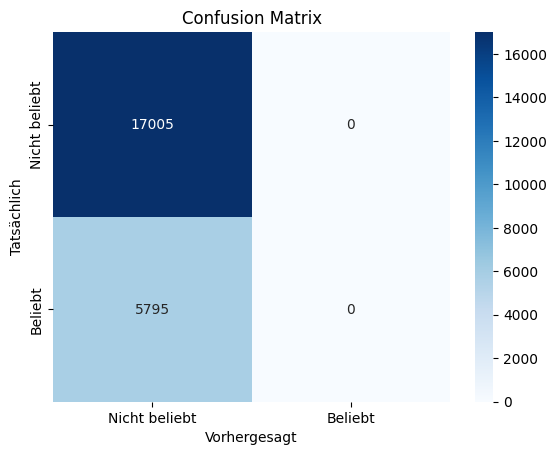

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Nicht beliebt", "Beliebt"], yticklabels=["Nicht beliebt", "Beliebt"])
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.title("Confusion Matrix")
plt.show()

### Beschreibung:
Die Confusion Matrix zeigt, wie gut das Modell zwischen beliebten und nicht beliebten Songs unterscheidet.

- Oben links (17'005): Songs, die korrekt als nicht beliebt klassifiziert wurden
- Unten links (5'795): Songs, die eigentlich beliebt sind, aber vom Modell als nicht beliebt eingestuft wurden
- Rechte Seite (jeweils 0): Das Modell hat keinen einzigen Song als beliebt vorhergesagt

Das Modell erkennt keine beliebten Songs (Recall = 0.00). Es stuft alle Songs als „nicht beliebt“ ein, was auf eine sehr konservative Vorhersage oder ein unausgewogenes Modell hinweist.

Diese Darstellung macht deutlich, dass das Modell in seiner jetzigen Form keine zuverlässige Klassifikation der Zielkategorie „beliebt“ ermöglicht.

### Bewertung der Klassifikation

Die Wahrheitsmatrix zeigt, dass das Modell beliebte Songs nicht erkennt:

- Precision für Klasse 1 (beliebt) liegt bei 0.00 → Wenn das Modell einen Song als beliebt vorhersagt, liegt es niemals richtig.
- Recall für Klasse 1 liegt bei 0.00 → Das Modell erkennt keinen der tatsächlich beliebten Songs.
- Die Accuracy liegt bei 0.75 → Das Modell ist insgesamt zu 75 % korrekt, klassifiziert aber nur „nicht beliebt“.
- Macro avg f1-score: 0.43 → Deutlich unterdurchschnittlich.

#### Interpretation:
Das Modell erkennt keine beliebten Songs. Es trifft nur dann Vorhersagen für „nicht beliebt“ und verpasst damit alle Songs, die eigentlich populär wären.
Dies zeigt, dass das Modell extrem konservativ ist und sich nicht „traut“, Songs als beliebt einzustufen.

#### Hypothese:
Das Modell erkennt zwar klare numerische Muster, aber entscheidende Informationen wie Künstlername, Genre oder Marketingfaktoren fehlen, die den Unterschied zwischen normalen und viralen Songs ausmachen könnten.
Zudem könnte das lineare Modell nicht ausreichen, um komplexe Zusammenhänge in der Musikpopularität zu erfassen.



## (4.4) Fazit zur Modellqualität

Mein Modell zeigt, dass sich gewisse musikalische Eigenschaften wie danceability, valence und energy grundsätzlich eignen, um grobe Trends in der Popularität vorherzusagen.
Allerdings ist der mittlere Fehler (MSE ≈ 489) hoch und der Bestimmtheitswert (R² = 0.01) sehr niedrig.
In der Klassifikation erkennt das Modell keinen einzigen beliebten Song korrekt. Weder zuverlässig noch mit Toleranz.

→ *Hypothese*: Das Modell ist zu vorsichtig. Es stuft Songs nur dann als beliebt ein, wenn sie extrem klar ins Muster passen, was in der Praxis kaum vorkommt.
Wichtige Einflussfaktoren wie Genre oder Künstlername fehlen. Zudem sind lineare Modelle oft nicht flexibel genug für reale Musikdaten.

→ *Ausblick*: Ein nicht lineares Modell (z. B. Random Forest oder Entscheidungsbaum) sowie zusätzliche, nicht-akustische Features könnten die Vorhersagegenauigkeit erheblich verbessern.